In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re
import nltk

In [11]:
dict_year = {'Sep18': 2018,
             'May19': 2019,
            'Oct19': 2019,
           'Feb20': 2020 }

In [12]:
df = pd.read_csv(r"C:\Users\rafkr\Downloads\archive (1)\immo_data.csv")

In [13]:
df

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


In [86]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [17]:
df_by_date = df.groupby('date')['regio1'].count().reset_index().rename(columns={'regio1': 'no_of_offers'})
year_order = ["Sep18", "May19", "Oct19", "Feb20"]
df_by_date['date'] = pd.Categorical(df_by_date['date'])
df_by_date['date'] = df_by_date['date'].cat.reorder_categories(year_order)
df_by_date = df_by_date.sort_values(by='date')

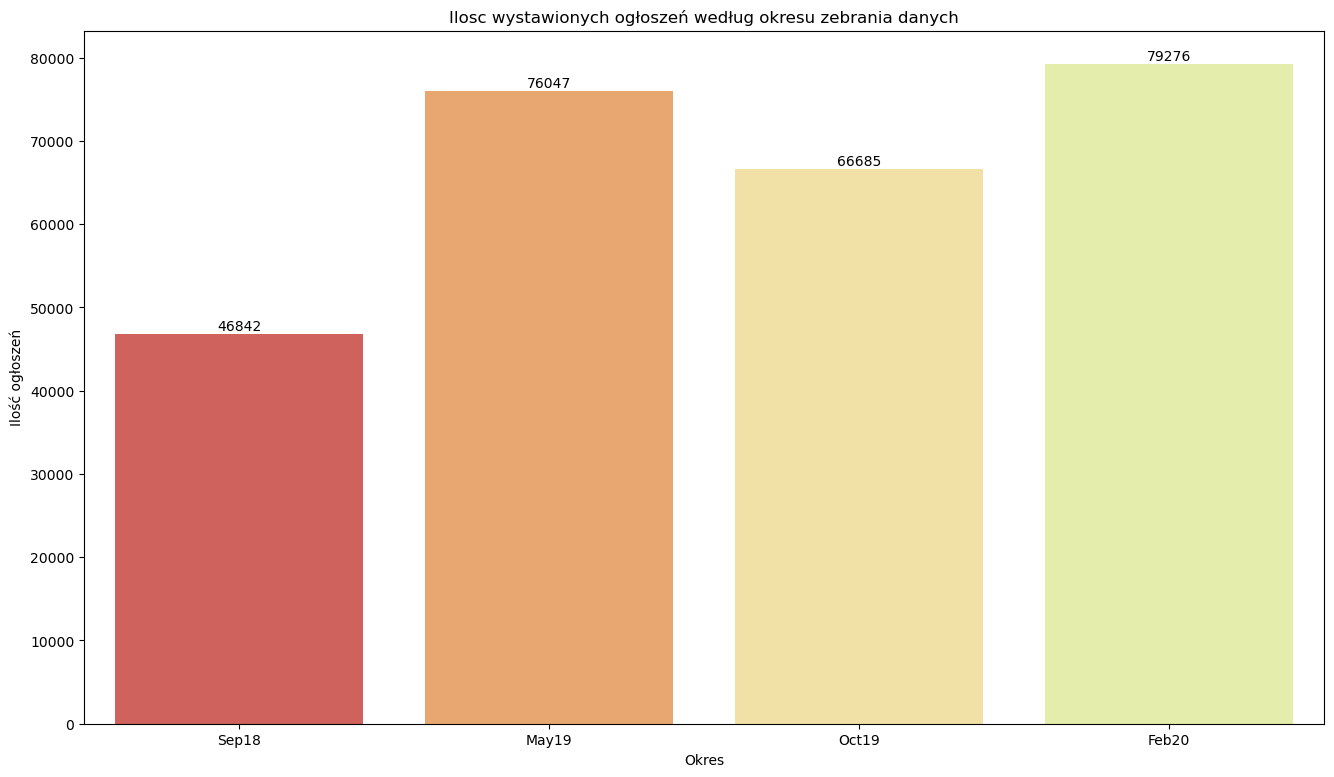

In [18]:
plt.figure(figsize=(16,9))
ax = sns.barplot(data=df_by_date,x='date',y='no_of_offers', palette=sns.color_palette('Spectral'))
ax.bar_label(ax.containers[0])
plt.title('Ilosc wystawionych ogłoszeń według okresu zebrania danych')
plt.xlabel('Okres')
plt.ylabel('Ilość ogłoszeń')
plt.show()

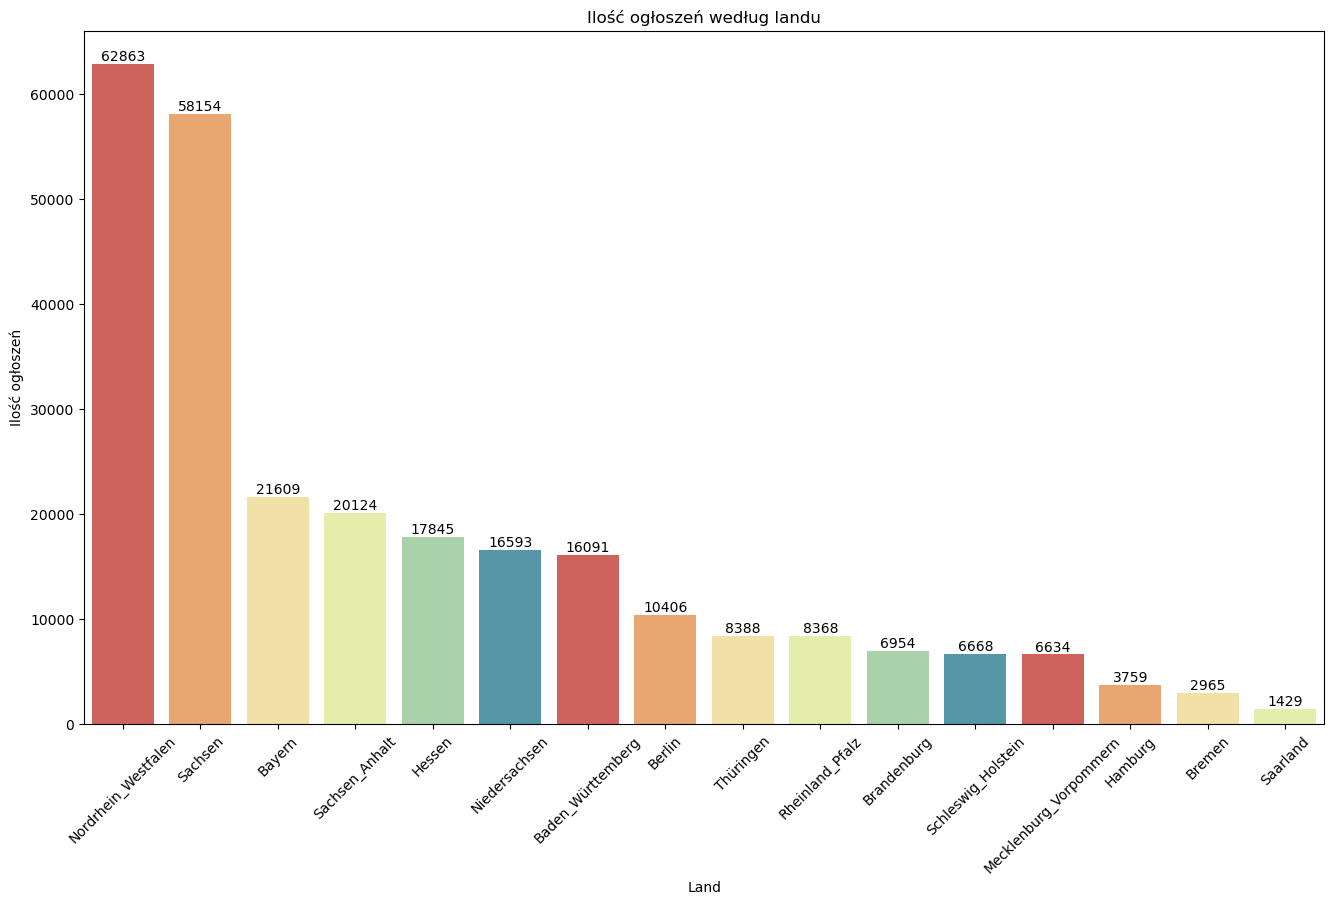

In [19]:
df_per_land = df.groupby('regio1')['picturecount'].count().reset_index().rename(columns={'picturecount': 'Ilosc_ogloszen', 'regio1':'Land'})
df_per_land = df_per_land.sort_values(by='Ilosc_ogloszen', ascending=False)
plt.figure(figsize=(16,9))
ax = sns.barplot(data=df_per_land, x='Land', y='Ilosc_ogloszen', palette=sns.color_palette('Spectral'))
plt.title('Ilość ogłoszeń według landu')
plt.xlabel('Land')
plt.ylabel('Ilość ogłoszeń')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

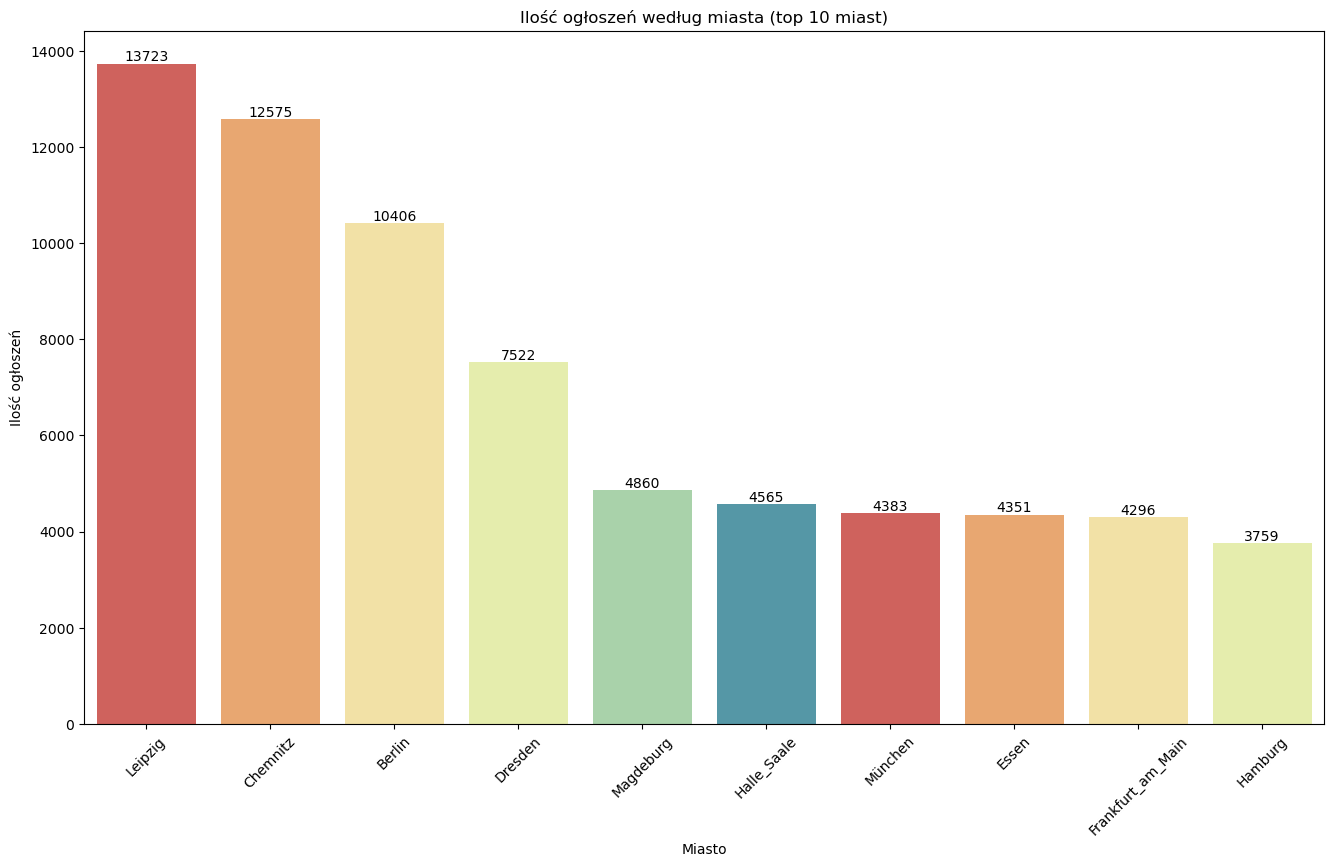

In [20]:
df_per_city = df.groupby('regio2')['picturecount'].count().reset_index().rename(columns={'picturecount': 'Ilosc_ogloszen', 'regio2':'Miasto'}).sort_values(by='Ilosc_ogloszen',ascending=False)
df_per_city = df_per_city.head(10)
plt.figure(figsize=(16,9))
ax = sns.barplot(data=df_per_city, x='Miasto', y='Ilosc_ogloszen', palette=sns.color_palette('Spectral'))
plt.title('Ilość ogłoszeń według miasta (top 10 miast)')
plt.xlabel('Miasto')
plt.ylabel('Ilość ogłoszeń')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

# Rok w którym wybudowano budynek

In [79]:
df_year = df.groupby(['yearConstructed'])['regio1'].count().reset_index().rename(columns={'regio1': 'ilosc_budynkow'})
df_year2 = df_year[df_year['yearConstructed'].between(1800,2021)]

df_year2['yearConstructed_bins'] = pd.qcut(df_year2['yearConstructed'],q=25)
df_year2['yearConstructed_bins_left'] = df_year2['yearConstructed_bins'].apply(lambda x: round(x.left))
df_year2['yearConstructed_bins_right'] = df_year2['yearConstructed_bins'].apply(lambda x: round(x.right))

C:\Users\rafkr\AppData\Local\Temp\ipykernel_17784\2838322913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year2['yearConstructed_bins'] = pd.qcut(df_year2['yearConstructed'],q=25)
C:\Users\rafkr\AppData\Local\Temp\ipykernel_17784\2838322913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year2['yearConstructed_bins_left'] = df_year2['yearConstructed_bins'].apply(lambda x: round(x.left))
C:\Users\rafkr\AppData\Local\Temp\ipykernel_17784\2838322913.py:6: SettingWithCopyWarning: 
A value is tr

In [80]:
df_year2['bins'] = '(' + df_year2['yearConstructed_bins_left'].astype(str) +', ' +df_year2['yearConstructed_bins_right'].astype(str) +'>'

df_year2 = df_year2.drop(columns=['yearConstructed_bins', 'yearConstructed_bins_left', 'yearConstructed_bins_right'])
df_year2 = df_year2.groupby(['bins'])['ilosc_budynkow'].sum().reset_index()

C:\Users\rafkr\AppData\Local\Temp\ipykernel_17784\2284666342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year2['bins'] = '(' + df_year2['yearConstructed_bins_left'].astype(str) +', ' +df_year2['yearConstructed_bins_right'].astype(str) +'>'


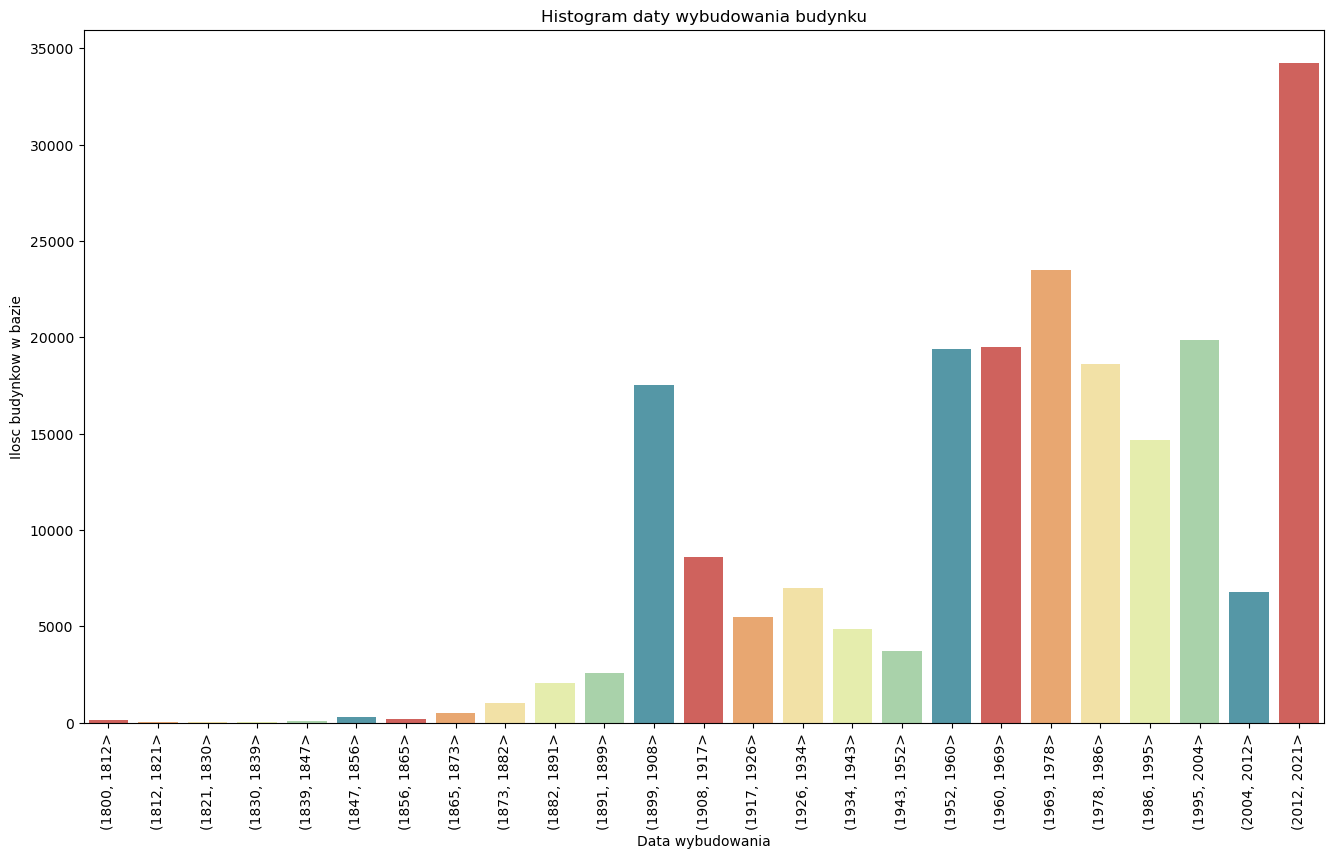

In [84]:
plt.figure(figsize=(16,9))
sns.barplot(data=df_year2,x='bins', y='ilosc_budynkow', palette=sns.color_palette('Spectral'))
plt.title('Histogram daty wybudowania budynku')
plt.xlabel('Data wybudowania')
plt.ylabel('Ilosc budynkow w bazie')
plt.xticks(rotation=90)
plt.show()

## Czynsz w 10 najczesciej wystepujacych w bazie miastach

In [95]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [96]:
df_rent = df[~df['totalRent'].isna()]
miasta = df_rent['regio2'].value_counts().head(10).index

In [97]:
df_rent2 = df_rent[df_rent['regio2'].isin(miasta)]
df_rent_gr = df_rent2.groupby('regio2')['totalRent'].agg([percentile(10), percentile(20), percentile(50), percentile(75), percentile(90)])
df_rent_gr = df_rent_gr.reset_index()

df_rent_melt = pd.melt(df_rent_gr, id_vars='regio2')

<Axes: xlabel='regio2', ylabel='value'>

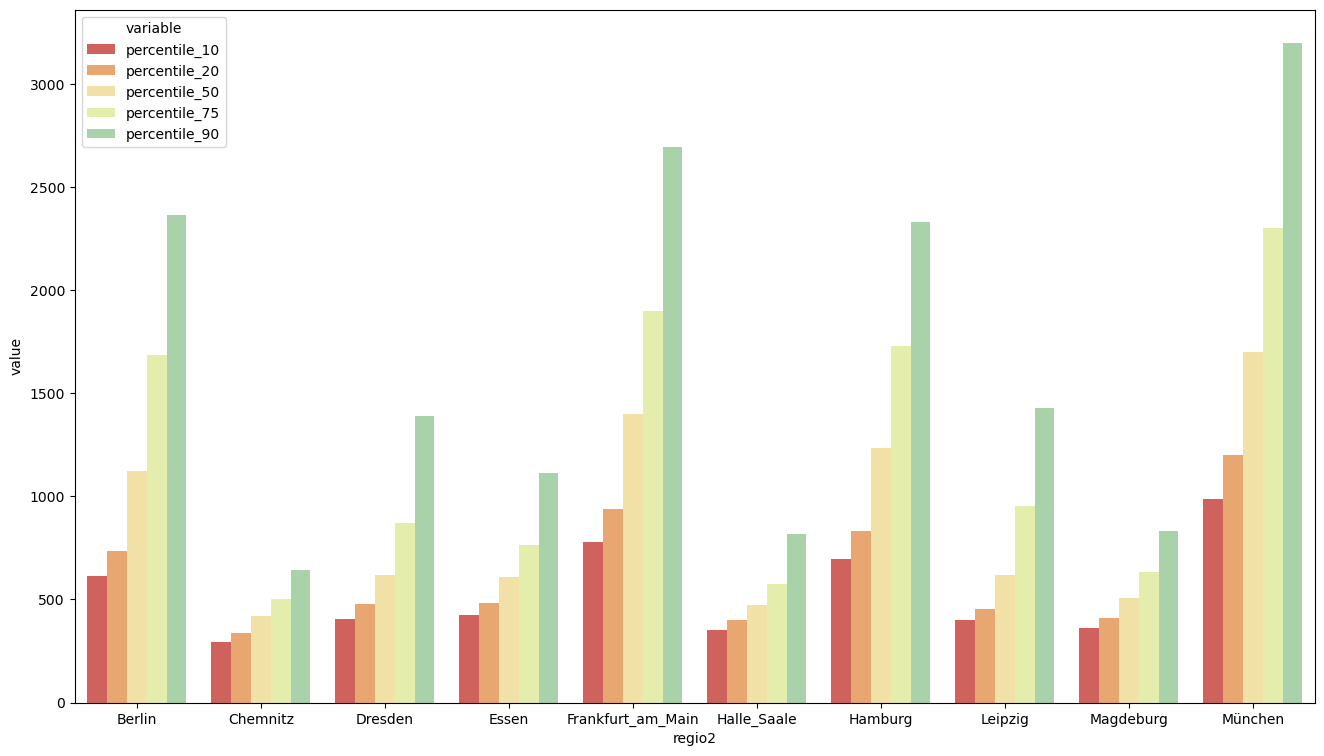

In [101]:
plt.figure(figsize=(16,9))
sns.barplot(data=df_rent_melt, x='regio2',y='value', hue='variable', palette=sns.color_palette('Spectral'))

### Gdzie jest najwiecej nowych budynkow

In [102]:
df_new = df[df['newlyConst']==True]
top10_new = df_new['regio2'].value_counts().head(10).index

df_new_top10= df_new[df_new['regio2'].isin(top10_new)]
df_top10 = df[df['regio2'].isin(top10_new)]

df_new_top10 = df_new_top10.groupby(['regio2'])['regio1'].count().reset_index().rename(columns={'regio1': 'Ilosc_nowych_na_wynajem'})

df_top10 = df_top10.groupby(['regio2'])['regio1'].count().reset_index().rename(columns={'regio1': 'Calkowita_ilosc_na_wynajem'})
df_new_top10

,regio2,Ilosc_nowych_na_wynajem
0,Berlin,1667
1,Dortmund,182
2,Dresden,960
3,Düsseldorf,290
4,Frankfurt_am_Main,547
5,Hamburg,633
6,Köln,187
7,Leipzig,1044
8,München,865
9,Segeberg_Kreis,190


In [103]:
df_top10

,regio2,Calkowita_ilosc_na_wynajem
0,Berlin,10406
1,Dortmund,3137
2,Dresden,7522
3,Düsseldorf,3711
4,Frankfurt_am_Main,4296
5,Hamburg,3759
6,Köln,2709
7,Leipzig,13723
8,München,4383
9,Segeberg_Kreis,667


In [104]:
df_new_ratio = df_new_top10.merge(df_top10, how='inner', on='regio2')
df_new_ratio['Wspolczynnik'] = df_new_ratio['Ilosc_nowych_na_wynajem'] / df_new_ratio['Calkowita_ilosc_na_wynajem'] * 100
df_new_ratio['Wspolczynnik'] = round(df_new_ratio['Wspolczynnik'],2)

In [118]:
df_new_ratio = df_new_ratio.sort_values(by='Wspolczynnik',ascending=False)

In [119]:
df_new_ratio

,regio2,Ilosc_nowych_na_wynajem,Calkowita_ilosc_na_wynajem,Wspolczynnik
9,Segeberg_Kreis,190,667,28.49
8,München,865,4383,19.74
5,Hamburg,633,3759,16.84
0,Berlin,1667,10406,16.02
2,Dresden,960,7522,12.76
4,Frankfurt_am_Main,547,4296,12.73
3,Düsseldorf,290,3711,7.81
7,Leipzig,1044,13723,7.61
6,Köln,187,2709,6.90
1,Dortmund,182,3137,5.80


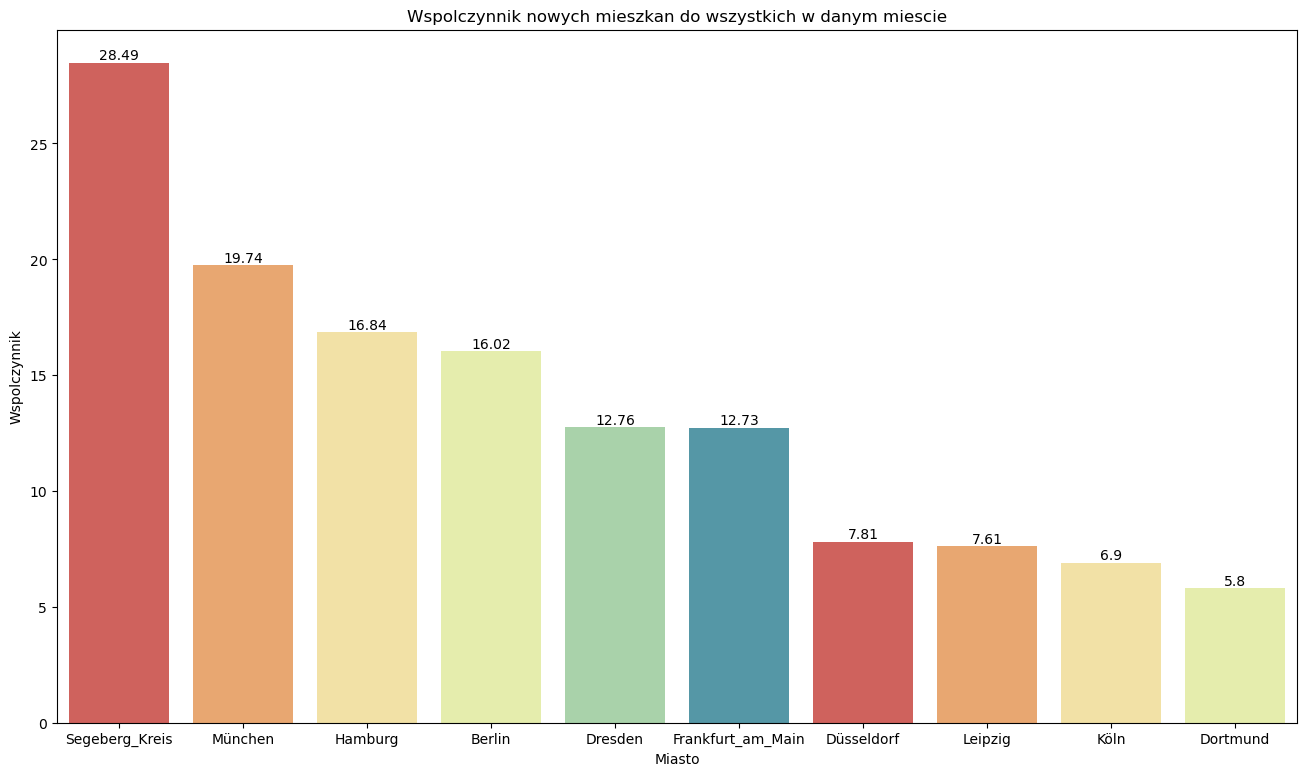

In [122]:
plt.figure(figsize=(16,9))
ax = sns.barplot(data=df_new_ratio, x='regio2',y='Wspolczynnik', palette=sns.color_palette('Spectral'))
plt.title('Wspolczynnik nowych mieszkan do wszystkich w danym miescie')
plt.xlabel('Miasto')
plt.ylabel('Wspolczynnik')
ax.bar_label(ax.containers[0])
plt.show()

# Stosunek średniego wynagrodzenia w Niemczech do czynszu

In [106]:
df2 = pd.read_csv(r"C:\Users\rafkr\Downloads\DP_LIVE_03062023180653840.csv")
df2 = df2[df2['LOCATION']=='DEU']
df2['Value'] = df2['Value'].astype(int)

df2['AvgMonthlySalary'] = round(df2['Value'] / 12)
df['YearOfOffer']= df['date'].map(dict_year)

df_merged = df.merge(df2[['TIME','AvgMonthlySalary']],how='inner', left_on='YearOfOffer', right_on='TIME')
df_merged['SalaryMinusBaseRent'] = df_merged['AvgMonthlySalary'] - df_merged['baseRent']
df_salary_rent = df_merged.groupby('regio2').agg({'SalaryMinusBaseRent': 'median'})

In [107]:
df_salary_rent.idxmin()

SalaryMinusBaseRent    München
dtype: object

In [108]:
df_salary_rent[df_salary_rent.index=='München']

,SalaryMinusBaseRent
regio2,
München,3144.0


In [109]:
df_salary_rent.idxmax()

SalaryMinusBaseRent    Plauen
dtype: object

In [110]:
df_salary_rent[df_salary_rent.index=='Plauen']

,SalaryMinusBaseRent
regio2,
Plauen,4409.2


In [111]:
df_salary_rent[df_salary_rent.index=='Berlin']

,SalaryMinusBaseRent
regio2,
Berlin,3734.0


# Korelacje

In [88]:
df_corr = df[['yearConstructed', 'totalRent', 'baseRent', 'livingSpace', 'noRooms']]

In [102]:
df_corr = df_corr.dropna(subset=['yearConstructed', 'totalRent', 'baseRent', 'livingSpace', 'noRooms'])

In [105]:
df_corr = df_corr.astype(int)

In [106]:
df_corr

,yearConstructed,totalRent,baseRent,livingSpace,noRooms
0,1965,840,595,86,4
2,2019,1300,965,83,3
4,1950,903,765,84,3
7,1959,584,452,60,3
8,1970,690,580,53,2
...,...,...,...,...,...
268843,1930,368,248,55,2
268845,2016,910,820,90,3
268846,1983,1150,930,115,3
268847,1965,930,650,95,4


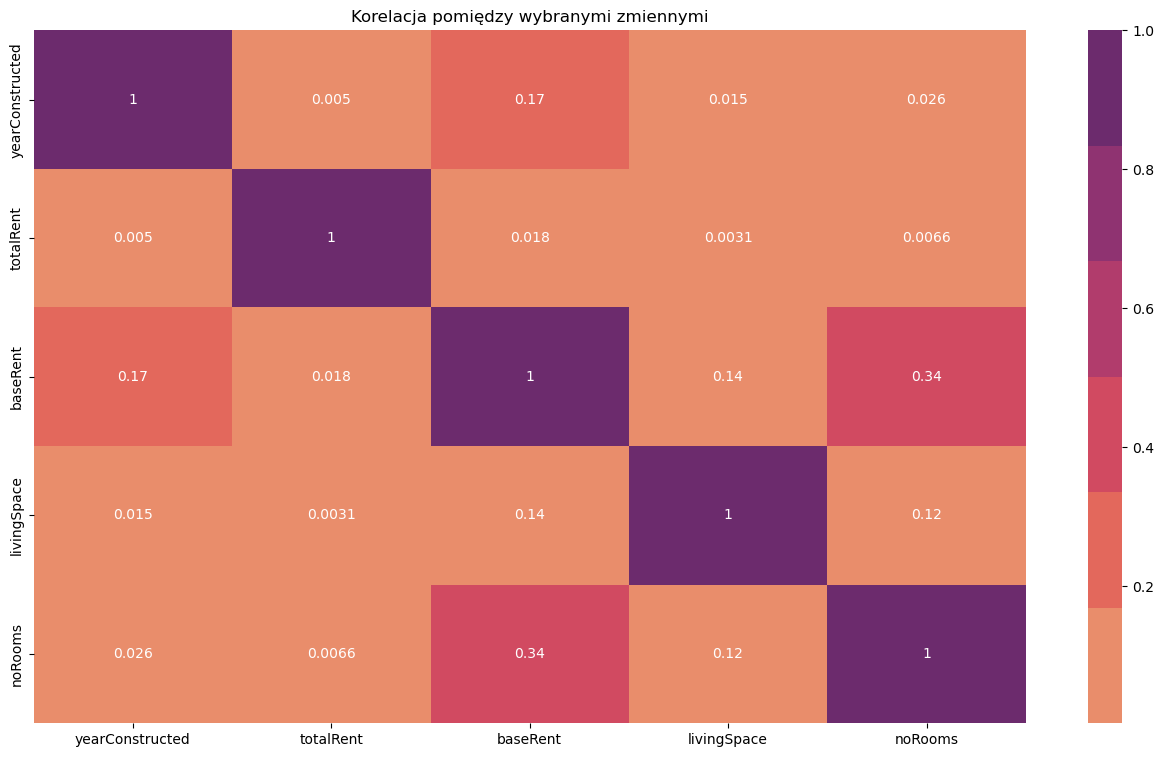

In [115]:
plt.figure(figsize=(16,9))
sns.heatmap(df_corr.corr(), cmap=sns.color_palette('flare') ,annot=True)
plt.title('Korelacja pomiędzy wybranymi zmiennymi')
plt.show()

# TOP 100 słów które występują w opisie mieszkania
## Dane po stemmingu i usunięciu stopwordsów

In [144]:
stopwords = nltk.corpus.stopwords.words('german')
df_words = df.copy()
df_words = df_words[['description']]

df_words['description2'] = df_words['description'].astype(str)

In [145]:
df_subset = df_words.iloc[:10000]
df_subset['description3'] = df_subset['description2'].apply(lambda x: nltk.word_tokenize(x))

porter = nltk.stem.PorterStemmer()
df_subset['description4'] = df_subset['description3'].apply(lambda cell: [porter.stem(x) for x in cell])
stemmed_list = df_subset['description4'].to_list()

stemmed_list_flattened = [item for sublist in stemmed_list for item in sublist]

counted_words = Counter(stemmed_list_flattened)
df_counted = pd.DataFrame.from_dict(counted_words,orient='index').reset_index()
df_counted = df_counted.rename(columns={'index': 'Slowo', 0: 'Ilosc_wystapien'})

df_counted['CzyStopword'] = df_counted['Slowo'].apply(lambda x: 1 if x in stopwords else 0)
df_counted = df_counted[df_counted['CzyStopword']==0].reset_index(drop=True)

df_counted['CzyStopword2'] = df_counted['Slowo'].apply(lambda x: 0 if re.match('[\w]+', x) else 1 )
df_counted = df_counted[df_counted['CzyStopword2']==0].reset_index(drop=True)
df_counted = df_counted.sort_values(by=['Ilosc_wystapien'],ascending=False)

In [183]:
n = df_counted['Ilosc_wystapien'].max()
df_counted_top100 = df_counted.iloc[:100]

In [221]:
index_list = [[i[0],i[-1]+1] for i in np.array_split(range(100), 5)]

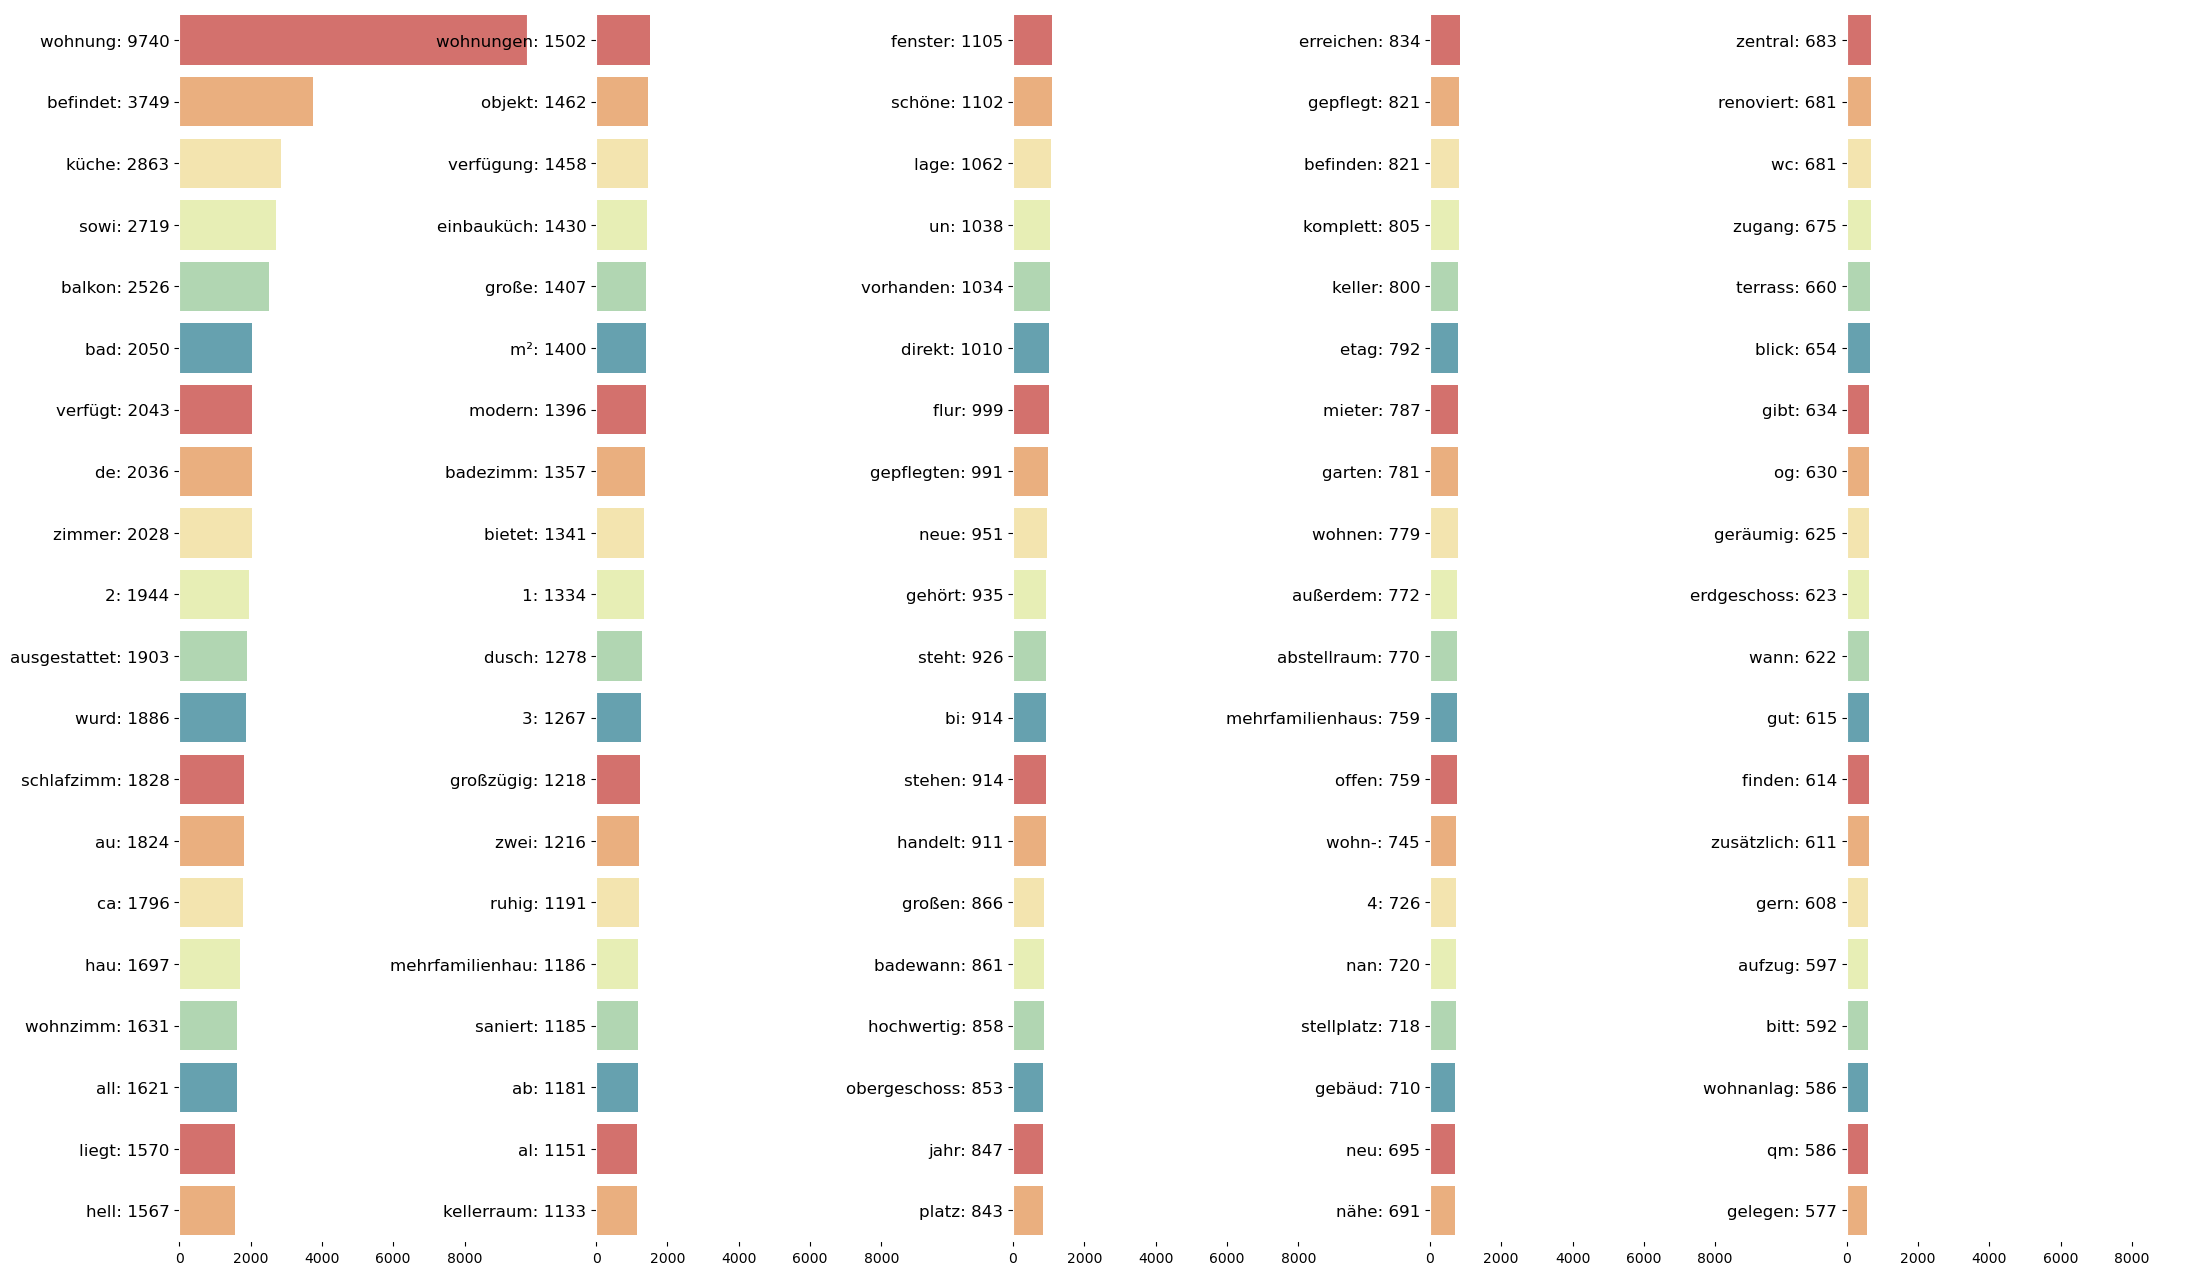

In [236]:
fig, axes = plt.subplots(1,5, figsize=(26,16), facecolor='white', squeeze=False)
for col, idx in zip(range(0,5), index_list):
    df_t = df_counted_top100[idx[0]:idx[-1]]
    
    label = [w + ': ' + str(n) for w,n in zip(df_t['Slowo'],df_t['Ilosc_wystapien'])]
    #color_l = [color_dict.get(i) for i in df_t['Ilosc_wystapien']]
    x = list(df_t['Ilosc_wystapien'])
    y = list(range(0,20))
    
    sns.barplot(x = x, y = y, data=df_t, alpha=0.9, orient = 'h',
                ax = axes[0][col],palette=sns.color_palette('Spectral'))
    
    axes[0][col].set_xlim(0,n+1)                     #set X axis range max
    axes[0][col].set_yticklabels(label, fontsize=12)
    axes[0][col].spines['bottom'].set_color('white')
    axes[0][col].spines['right'].set_color('white')
    axes[0][col].spines['top'].set_color('white')
    axes[0][col].spines['left'].set_color('white')
